In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
mavenn.__path__

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/mavenn']

In [3]:
data_df = pd.read_csv('data_df_mut2.csv.gz')
data_df.rename(columns={'x_full':'x'}, inplace=True)

In [4]:
data_df

,x,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,ct_10,ct_11
0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,1,0,0,0,0,0,0,0
1,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,1,0,0,0,0,0,0,0
2,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,1,0,0,0,0,0,0,0
3,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,1,0,0,0,0,0,0,0
4,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379847,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,1,0,0,0,0
1379848,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,1,0,0,0,0
1379849,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,1,0,0,0,0
1379850,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
np.random.seed(0)
data_df['set'] = np.random.choice(a=['training','test','validation'], 
                                   p=[.6,.2,.2], 
                                   size=len(data_df))

In [6]:
# # Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')

test N: 275,818
training + validation N: 1,104,034


In [7]:
# Comptue sequence length and number of bins
L = len(data_df['x'][0])
y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=150, Y=12


In [8]:
# define custom gp_map parameters dictionary

gpmap_kwargs = {'L':L,
                'C':4,
                'theta_regularization': 0.05,
                'CRP_start':37,
                'CRP_end':57,
                'xylR_start':58,
                'xylR_end':89,
                'RNAP_start':91,
                'RNAP_end':122,
                'regularizer':0.05}


In [24]:
for idx in range(1):
    
    # # Create model
    model = mavenn.Model(L=L, 
                         Y=Y,
                         alphabet='dna', 
                         regression_type='MPA', 
                         gpmap_type='additive',
                         mpa_hidden_nodes=50)

    # Set training data
    model.set_data(x=data_df['x'],
                   y=data_df[y_cols],
                   verbose=True,
                   validation_flags=(data_df['set']=='validation'),
                   shuffle=True)

    # Fit model to data
    model.fit(learning_rate=.0005,
              epochs=100,
              verbose=True,
              try_tqdm=False,
              batch_size=1000,
              early_stopping=True,
              early_stopping_patience=3,
              linear_initialization=False)

    #model.save(f'21.12.25.xylE_models/xylE_model_full_dataset_mut_2')

In [10]:
# batch size for full_dataset_model_2 was 1000, lr = 0.0005 regularizer = 0.1
# batch size for full_dataset_model_3 was 1000, lr = 0.0003, regularizer = 0.01
# batch size for full_dataset_model_3 was 2000, lr = 0.0008, regularizer = 0.05
# batch size for full_dataset_model_4 was 2000, lr = 0.001, regularizer = 0.05
# batch size for full_dataset_model_5 was 2000, lr = 0.001, regularizer = 0.05
# batch size for full_dataset_model_6 was 3000, lr = 0.001, regularizer = 0.05

In [12]:
#model.save('21.21.19.xylE_models/xylE_model_full_dataset_3_no_data')
#model = mavenn.load('21.21.19.xylE_models/xylE_model_full_dataset_4')

In [13]:
!ls 21.12.25.xylE_models

xylE_model_full_dataset_mut_1.h5     xylE_model_full_dataset_mut_2.pickle
xylE_model_full_dataset_mut_1.pickle xylE_model_full_dataset_mut_3.h5
xylE_model_full_dataset_mut_2.h5     xylE_model_full_dataset_mut_3.pickle


In [14]:
# Subsample indices for easy plotting and information estimation
N_subsampled_test = len(test_df)
ix_test = np.random.rand(N_subsampled_test) < .1

# Get x and y
x_test = test_df['x'][ix_test]
y_test = test_df[y_cols][ix_test]

In [15]:
# x_test = test_df['x']
# y_test = test_df[y_cols]

In [16]:
x_test.shape

(27546,)

On test data:
I_var_test: 0.416 +- 0.006 bits
I_pred_test: 0.427 +- 0.007 bits


Text(0.5, 1.0, 'training hisotry')

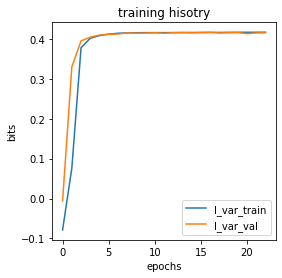

In [17]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
#ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
#ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

In [18]:
theta = np.squeeze(model.get_nn().layers[2].get_weights()[1])

In [19]:
theta_df = pd.DataFrame(theta,columns=model.alphabet)


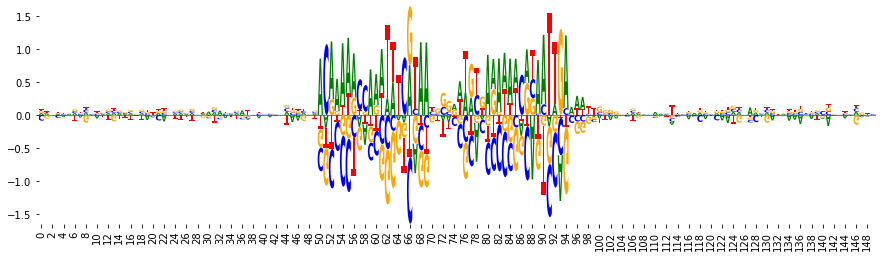

In [20]:
# # Get G-P map parameters in matrix form
# theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# # Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,4])

tick_spacing=2
theta_logo  = logomaker.Logo(theta_df,ax=axs,center_values=True)
theta_logo.style_xticks(anchor=0, spacing=tick_spacing, rotation=90)
theta_logo.style_spines(visible=False)
#theta_logo.highlight_position_range(0,21,alpha=0.5,color='lavenderblush',label='CRP')
#crp_logo.style_glyphs_in_sequence(sequence='.TGTGA......TCACA...', color='darkred')
#theta_logo.ax.set_xticklabels('%+d'%x for x in np.arange(-125,-107+1,tick_spacing))



In [25]:
#theta_df.to_csv('21.12.25.matrices/xylR_df.csv.gz',index=False)